In [1]:
from email_report import *
from models import find_chgpts
import matplotlib.pyplot as plt

In [2]:
# Generate random data
xs = [np.random.randn(np.random.randint(10, 20)) + mean for mean in [10, 14, 8, 11]]
x = np.concatenate(xs)
t = range(len(x))

alpha = 0.005

Text(0, 0.5, 'Values')

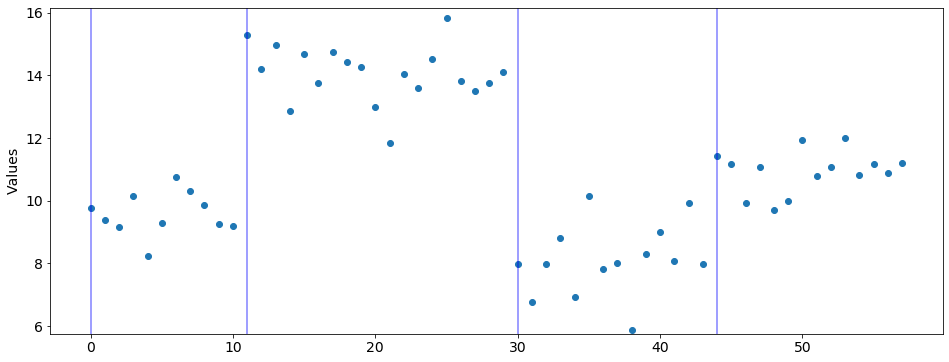

In [3]:
# Test changepoint detector
chgpts, detpts, votes = find_chgpts(x, alpha=alpha, num_test=5)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))

plt.scatter(np.arange(len(x)), x)
# plt.xlim(0, len(x))
plt.ylim(x.min()*.98,x.max()*1.02)
plt.vlines(chgpts, x.min()-1, x.max()+1, color='blue', alpha=.5)
plt.ylabel('Values')

0 pass, 9.77, 9.77, 0.00
1 pass, 9.38, 9.57, 0.19
2 pass, 9.16, 9.44, 0.25
3 pass, 10.14, 9.61, 0.37
4 pass, 8.23, 9.34, 0.65
5 pass, 9.28, 9.33, 0.59
6 pass, 10.75, 9.53, 0.74
7 pass, 10.32, 9.63, 0.74
8 pass, 9.86, 9.65, 0.70
9 pass, 9.27, 9.62, 0.67
10 pass, 9.19, 9.58, 0.65
11 warn, 15.28, 10.05, 1.70
12 warn, 14.22, 10.37, 1.97
13 fail, 14.98, 10.70, 2.24
14 pass, 12.86, 14.33, 0.94
15 pass, 14.68, 14.40, 0.85
16 pass, 13.76, 14.29, 0.81
17 pass, 14.75, 14.36, 0.77
18 pass, 14.42, 14.37, 0.72
19 pass, 14.25, 14.35, 0.68
20 pass, 13.00, 14.22, 0.76
21 pass, 11.85, 14.00, 0.99
22 pass, 14.03, 14.01, 0.95
23 pass, 13.60, 13.97, 0.92
24 pass, 14.52, 14.01, 0.90
25 pass, 15.84, 14.14, 0.98
26 pass, 13.81, 14.11, 0.95
27 pass, 13.50, 14.08, 0.94
28 pass, 13.74, 14.06, 0.91
29 pass, 14.10, 14.06, 0.89
30 pass, 8.00, 13.76, 1.58
31 pass, 6.78, 13.43, 2.14
32 pass, 7.98, 13.18, 2.38
33 pass, 8.80, 7.89, 0.72
34 pass, 6.92, 7.70, 0.75
35 pass, 10.16, 8.11, 1.14
36 pass, 7.82, 8.07, 1.06
37 

(4.872494411075991, 16.84359826815988)

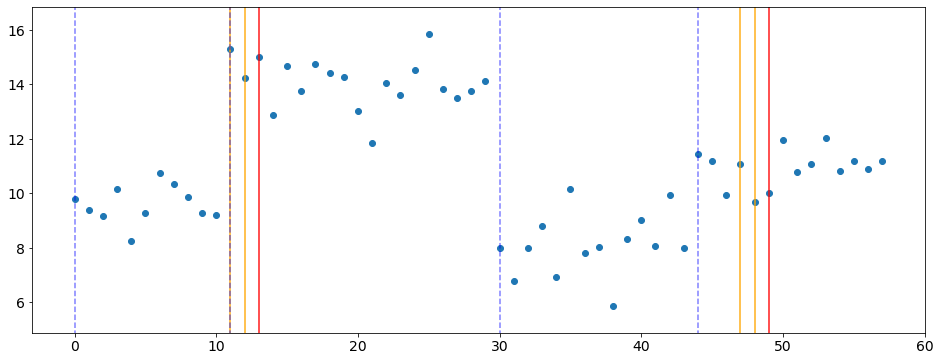

In [4]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(16, 6))
for i in range(len(x)):
    output = changepoint_test(x[:i+1], alpha)
    if output[0] == 'warn':
        plt.vlines(i, -100, 100, color='orange', alpha=.9)
    if output[0] == 'fail':
        plt.vlines(i, -100, 100, color='red', alpha=.9)
    print(i, '%s, %.2f, %.2f, %.2f' % output)
    
plt.scatter(np.arange(len(x)), x)
plt.vlines(chgpts, -100, 100, color='blue', alpha=.5, linestyles='dashed')
plt.ylim(x.min()-1, x.max()+1)